In [1]:
from Node import *
from Graph import Graph
from Network import Network

# Tutorial

# 1. Node

Trong project này em implement lại các node cơ bản 

Có các loại node sau đây
*   **Label node**: Label_Node(id_name : str, states : list)
*   **Boolean node**: Boolean_Node(id_name : str, states = [True, False])
  *   **OR node**: OR_Node(id_name : str)
  *   **AND node**: AND_Node(id_name : str)
  *   **MtoN node**: MtoN_Node(id_name : str, M: int)
*   **Ranked node**: Ranked_Node(id_name : str, states : list, mean : float, std : float)
  * **Weighted_Node**: Weighted_Node(id_name : str, states: list, weighted_mean : dict, mean = None, std : str)

In [2]:
node1 = Boolean_Node('node1')
node2 = Label_Node('node2',['football', 'tennis','volley ball'])
node3 = Ranked_Node('node3',['very low','low','medium','high','very high'], mean = 0.5, std = 0.5)
node4 = Boolean_Node('node4')
node5 = Weighted_Node('node5', ['very low','low','medium'], weighted_mean = {node1: 0.5, node2:0.5}, std = 1)

# 2. Graph

In [3]:
G = Graph()

thêm các nodes vào Graph: 

G.add_nodes(*danh sách các nodes)

In [4]:
G.add_nodes(node1,node2,node3,node4)

thêm cạnh giữa các nodes vào Graph:

G.add_edges(*danh sách các cạnh)

In [5]:
G.add_edges((node1,node2),(node3,node2),(node2,node4))

[<Node.Boolean_Node object at 0x000002676B3F6A60>, <Node.Label_Node object at 0x000002676B3F6A00>, <Node.Ranked_Node object at 0x000002676B3F6790>, <Node.Boolean_Node object at 0x000002676B3F6AF0>]


visualize Graph

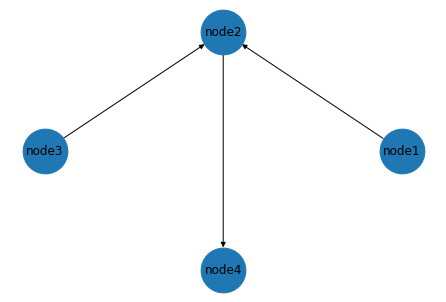

In [6]:
G.visualize()

# 3. Network

truyền một Graph vào network để khởi tạo

In [7]:
network = Network(graph = G)

tạo NPT cho các nodes thông qua hàm 
help_generate_NPT(list_nodes, path_to_forder)

In [8]:
network.help_generate_NPT([node1,node2],path_to_folder='data/test')

base NPT of node1 is stored in: data/test/node1.csv
base NPT of node2 is stored in: data/test/node2.csv


NPT của một node được lưu theo file CSV

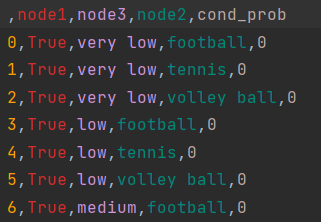

Điền thủ công các giá trị vào file (function node không cần)

Sử dụng hàm **.set_NPT_from_csv(node: Node, path)** để set NPT cho một node

Sau khi gán NPT cho tất cả các node trong mạng:

 * sử dụng **.initial_states()** để xem trạng thái ban đầu của mạng
 * sử dụng **.conditional_probability(observation: dict, conditional: dict)** để tính xác suất điều kiện
 * sử dụng **.marginal_probability(observation: dict)** để tính xác suất biên
 * sử dụng **.set_evidence(self, evidence: dict)** để xem trạng thái của mạng khi set evidence

# 4. Example

## 4.1. 

In [9]:
node1 = Boolean_Node('node1')
node2 = Boolean_Node('node2')
node3 = Boolean_Node('node3')

In [10]:
G = Graph()
G.add_nodes(node1,node2,node3)
G.add_edges((node1, node3),(node2,node3))

[<Node.Boolean_Node object at 0x000002676B52CC10>, <Node.Boolean_Node object at 0x000002676B52CA90>, <Node.Boolean_Node object at 0x000002676B52CCD0>]


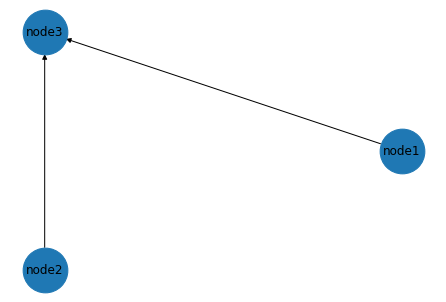

In [11]:
G.visualize()

In [12]:
net = Network(G)

In [13]:
# net.help_generate_NPT([node1,node2,node3],'data/ex1')

In [14]:
net.set_NPT_from_csv(node1, 'data/ex1/node1.csv')
net.set_NPT_from_csv(node2, 'data/ex1/node2.csv')
net.set_NPT_from_csv(node3, 'data/ex1/node3.csv')

In [15]:
node1.NPT

,Unnamed: 0,node1,cond_prob
0,0,True,0.5
1,1,False,0.5


In [16]:
node2.NPT

,Unnamed: 0,node2,cond_prob
0,0,True,0.2
1,1,False,0.8


In [17]:
node3.NPT

,Unnamed: 0,node1,node2,node3,cond_prob
0,0,True,True,True,1.0
1,1,True,True,False,0.0
2,2,True,False,True,0.5
3,3,True,False,False,0.5
4,4,False,True,True,0.5
5,5,False,True,False,0.5
6,6,False,False,True,0.0
7,7,False,False,False,1.0


In [18]:
net.initial_states()

******************************
Initial states
Table of node:  node1
+-------+------+
| state | prob |
+-------+------+
|  True | 0.5  |
| False | 0.5  |
+-------+------+
Table of node:  node2
+-------+------+
| state | prob |
+-------+------+
|  True | 0.2  |
| False | 0.8  |
+-------+------+
Table of node:  node3
+-------+------+
| state | prob |
+-------+------+
|  True | 0.35 |
| False | 0.65 |
+-------+------+
******************************



In [19]:
net.set_evidence({node3: True})

******************************
set evidence {'node3': True}
Table of node:  node1
+-------+---------+
| state |   prob  |
+-------+---------+
|  True | 0.85714 |
| False | 0.14286 |
+-------+---------+
Table of node:  node2
+-------+---------+
| state |   prob  |
+-------+---------+
|  True | 0.42857 |
| False | 0.57143 |
+-------+---------+
******************************



In [20]:
net.marginal_probability({node3:False, node1:True})

0.2

In [21]:
net.conditional_probability(observation = {node3: True}, conditional = {node1:True,node2: False})

0.5

In [22]:
net.conditional_probability(observation = {node3: True,node1:True}, conditional = {node2: False})

0.25

In [23]:
net.conditional_probability(observation = {node3: True}, conditional = {node2: False})

0.25

## 4.2.

In [24]:
cpu = Boolean_Node('cpu')
keyboard = Boolean_Node('keyboard')
screen = Boolean_Node('screen')
hard_disk = Boolean_Node('hard_disk')
system = OR_Node('system')

In [25]:
G = Graph()
G.add_nodes(cpu,keyboard,screen,hard_disk,system)

In [26]:
G.add_edges((cpu,system),(keyboard,system),(screen,system),(hard_disk,system))

[<Node.Boolean_Node object at 0x000002676B566430>, <Node.Boolean_Node object at 0x000002676B40FA90>, <Node.Boolean_Node object at 0x000002676B566400>, <Node.Boolean_Node object at 0x000002676B5663D0>, <Node.OR_Node object at 0x000002676B566820>]


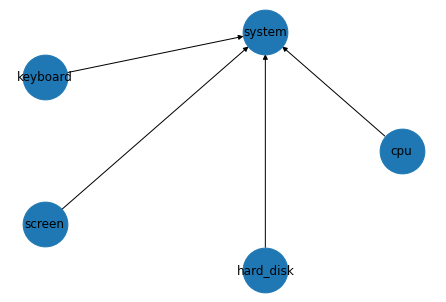

In [27]:
G.visualize()

In [28]:
net = Network(G)

In [29]:
# net.help_generate_NPT([cpu,keyboard,screen,hard_disk], 'data/ex2')

In [30]:
net.set_NPT_from_csv(cpu,'data/ex2/cpu.csv')
net.set_NPT_from_csv(keyboard,'data/ex2/keyboard.csv')
net.set_NPT_from_csv(screen,'data/ex2/screen.csv')
net.set_NPT_from_csv(hard_disk,'data/ex2/hard_disk.csv')

In [31]:
net.set_NPT_func(system)

In [32]:
print(system.NPT)

      cpu  keyboard  screen  hard_disk  system  cond_prob
0    True      True    True       True    True          1
1    True      True    True       True   False          0
2    True      True    True      False    True          1
3    True      True    True      False   False          0
4    True      True   False       True    True          1
5    True      True   False       True   False          0
6    True      True   False      False    True          1
7    True      True   False      False   False          0
8    True     False    True       True    True          1
9    True     False    True       True   False          0
10   True     False    True      False    True          1
11   True     False    True      False   False          0
12   True     False   False       True    True          1
13   True     False   False       True   False          0
14   True     False   False      False    True          1
15   True     False   False      False   False          0
16  False     

In [33]:
net.full_marginal({system:True,cpu:True,keyboard:True,screen:True,hard_disk:True})

0.0075

In [34]:
net.marginal_probability({cpu:True})

0.5

## 4.3. 

In [43]:
r1 = Ranked_Node('rank1',['1','2','3'],1,1)
r2 = Ranked_Node('rank2',['1','2'],0,1)
r3 = Weighted_Node('rank3',['1','2','3'], {r1:1/2, r2:1/2},std = 0.5)

[<Node.Ranked_Node object at 0x000002676B87E100>, <Node.Ranked_Node object at 0x000002676B87E0A0>, <Node.Weighted_Node object at 0x000002676B886580>]


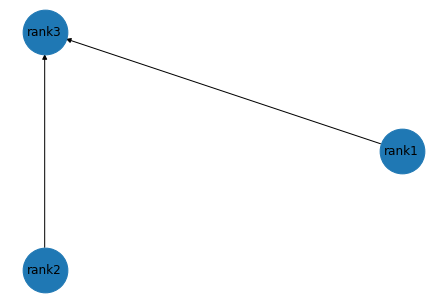

In [44]:
G = Graph()
G.add_nodes(r1,r2,r3)
G.add_edges((r1,r3),(r2,r3))
G.visualize()

In [45]:
net = Network(G)

In [46]:
net.set_NPT_func(r1)

In [47]:
print(r1.NPT)

  rank1  cond_prob
0     1   0.274905
1     2   0.342612
2     3   0.382483


In [48]:
net.set_NPT_func(r2)
net.set_NPT_func(r3)

In [49]:
print(r2.NPT)
print(r3.NPT)

  rank2  cond_prob
0     1   0.560906
1     2   0.439094
   rank1 rank2 rank3  cond_prob
0      1     1     1      0.519
1      1     1     2      0.338
2      1     1     3      0.143
3      1     2     1      0.412
4      1     2     2      0.371
5      1     2     3      0.217
6      2     1     1      0.448
7      2     1     2      0.362
8      2     1     3      0.190
9      2     2     1      0.342
10     2     2     2      0.381
11     2     2     3      0.276
12     3     1     1      0.377
13     3     1     2      0.377
14     3     1     3      0.246
15     3     2     1      0.276
16     3     2     2      0.381
17     3     2     3      0.342
